<a href="https://colab.research.google.com/github/swadhinpal/MachineLearning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/gakudo-ai/open-datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:, [3, 4]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# K-means with k=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

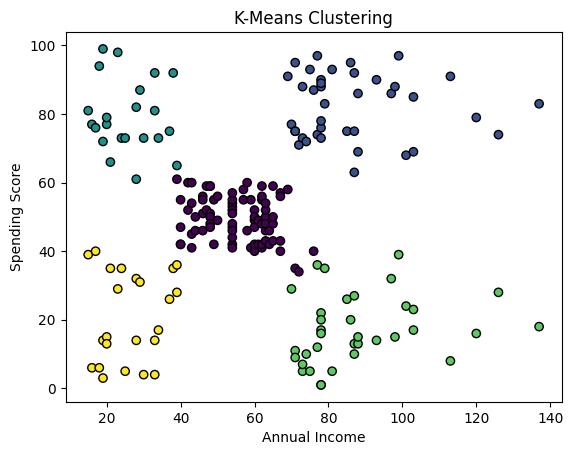

In [5]:
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()

Hierarchical Clustering

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

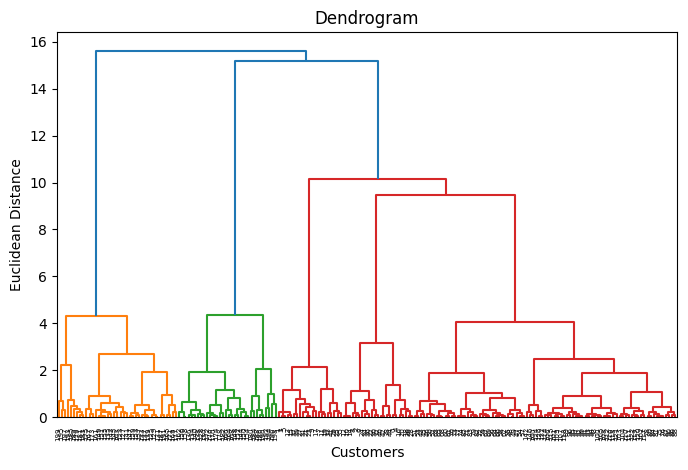

In [10]:
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

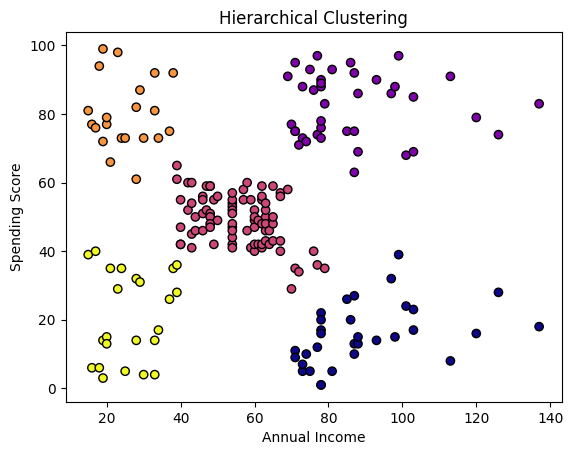

In [11]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster_HC'] = hc.fit_predict(X_scaled)

plt.scatter(X[:, 0], X[:, 1], c=df['Cluster_HC'], cmap='plasma', edgecolors='k')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering')
plt.show()